In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, KFold

df = pd.read_csv("../DataSet/heart.csv")
df.head()#默认显示时前五行数据


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


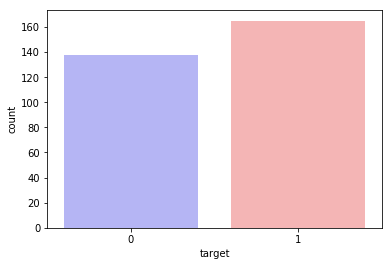

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [16]:
sns.countplot(x="target", data=df, palette="bwr")#画图
plt.show()
df.info()#查看表格的基本情况


In [17]:
df.describe()#查看基本的统计信息




,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [18]:
#哑变量处理，又或者叫虚拟变量，prefix设置前缀
a = pd.get_dummies(df.cp, prefix = "cp")
b = pd.get_dummies(df.thal, prefix = "thal")
c = pd.get_dummies(df.slope, prefix = "slope")
#axis = 1, 表示在垂直方向(column)进行连接
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


In [19]:
#删除原来的三列(因为上一步这三个分类变量已经转换为虚拟变量了)
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()



,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


In [20]:
y = df.target.values
#删除列要加axis=1，默认是删除行的，与df.drop(columns = ['target'])等价
x_data = df.drop(['target'], axis = 1)
#数据归一化
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values
print(x)
#train_test_split函数用于将矩阵随机划分为训练子集和测试子集，
# 并返回划分好的训练集测试集样本和训练集测试集标签
#80%训练集，20%测试集
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)


          age  sex  trestbps      chol  fbs  restecg   thalach  exang  \
0    0.708333  1.0  0.481132  0.244292  1.0      0.0  0.603053    0.0   
1    0.166667  1.0  0.339623  0.283105  0.0      0.5  0.885496    0.0   
2    0.250000  0.0  0.339623  0.178082  0.0      0.0  0.770992    0.0   
3    0.562500  1.0  0.245283  0.251142  0.0      0.5  0.816794    0.0   
4    0.583333  0.0  0.245283  0.520548  0.0      0.5  0.702290    1.0   
5    0.583333  1.0  0.433962  0.150685  0.0      0.5  0.587786    0.0   
6    0.562500  0.0  0.433962  0.383562  0.0      0.0  0.625954    0.0   
7    0.312500  1.0  0.245283  0.312785  0.0      0.5  0.778626    0.0   
8    0.479167  1.0  0.735849  0.166667  1.0      0.5  0.694656    0.0   
9    0.583333  1.0  0.528302  0.095890  0.0      0.5  0.786260    0.0   
10   0.520833  1.0  0.433962  0.257991  0.0      0.5  0.679389    0.0   
11   0.395833  0.0  0.339623  0.340183  0.0      0.5  0.519084    0.0   
12   0.416667  1.0  0.339623  0.319635  0.0      0.

In [21]:
#逻辑回归
accuracies = {}
lr = LogisticRegression()
lr.fit(x_train,y_train)
acc = lr.score(x_test,y_test)*100
lr_prediction = lr.predict(x_test)
print('预测的结果:',lr_prediction)
print("分类报告:每个类别的精确率和召回率等指标：\n", classification_report(y_test, lr_prediction))
accuracies['Logistic Regression'] = acc
print("逻辑回归测试准确率:%.2f%%" %acc)

#交叉验证
from sklearn.model_selection import cross_val_score
kf = KFold(n_splits=5, shuffle=True)
score_ndarray = cross_val_score(lr, x, y, cv=kf)
print(score_ndarray)
print('五折交叉验证的评分均值',score_ndarray.mean())





预测的结果: [0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 1 0
 1 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1]
分类报告:每个类别的精确率和召回率等指标：
              precision    recall  f1-score   support

          0       0.85      0.85      0.85        27
          1       0.88      0.88      0.88        34

avg / total       0.87      0.87      0.87        61

逻辑回归测试准确率:86.89%
[0.86885246 0.81967213 0.83606557 0.81666667 0.83333333]
五折交叉验证的评分均值 0.834918032786885


预测的结果: [0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 1 1 1]
分类报告:每个类别的精确率和召回率等指标：
              precision    recall  f1-score   support

          0       0.67      0.96      0.79        27
          1       0.95      0.62      0.75        34

avg / total       0.83      0.77      0.77        61

2 NN Score: 77.05%
KNN最高准确率: 88.52%


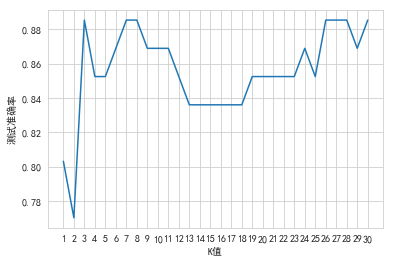

In [62]:
#K邻近算法
#KNeighborsClassifier()的参数就是K值，这里我们随便设置K=2
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(2) 
knn.fit(x_train, y_train)
knn_prediction = knn.predict(x_test)
print('预测的结果:',knn_prediction)
print("分类报告:每个类别的精确率和召回率等指标：\n", classification_report(y_test, knn_prediction))
print("{} NN Score: {:.2f}%".format(2, knn.score(x_test, y_test)*100))

# 找寻最优的K值
scoreList = []
for i in range(1,31):
    knn2 = KNeighborsClassifier(i)  
    knn2.fit(x_train, y_train)
    scoreList.append(knn2.score(x_test, y_test))
    
plt.plot(range(1,31), scoreList)
plt.xticks(np.arange(1,31,1))
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
plt.xlabel("K值")
plt.ylabel("测试准确率")
plt.show()

acc = max(scoreList)*100
accuracies['KNN'] = acc
print("KNN最高准确率: {:.2f}%".format(acc))


In [63]:
#支持向量机算法
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(x_train, y_train)
acc = svm.score(x_test,y_test)*100
accuracies['SVM'] = acc
svm_prediction = svm.predict(x_test)
print('预测的结果:',svm_prediction)
print("分类报告:每个类别的精确率和召回率等指标：\n", classification_report(y_test, svm_prediction))
print("SVM测试准确率: {:.2f}%".format(acc))



预测的结果: [0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0
 1 0 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1]
分类报告:每个类别的精确率和召回率等指标：
              precision    recall  f1-score   support

          0       0.85      0.85      0.85        27
          1       0.88      0.88      0.88        34

avg / total       0.87      0.87      0.87        61

SVM测试准确率: 86.89%


In [37]:
#Gaussian naive Bayes（高斯朴素贝叶斯）
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
acc = nb.score(x_test,y_test)*100
accuracies['Naive Bayes'] = acc
nb_prediction = nb.predict(x_test)
print('预测的结果:',nb_prediction)
print("分类报告:每个类别的精确率和召回率等指标：\n", classification_report(y_test, nb_prediction))
print("Naive Bayes测试准确率: {:.2f}%".format(acc))


Naive Bayes测试准确率: 86.89%


In [32]:
#决策树分类算法
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

acc = dtc.score(x_test, y_test)*100
accuracies['Decision Tree'] = acc
dtc_prediction = dtc.predict(x_test)
print('预测的结果:',dtc_prediction)
print("分类报告:每个类别的精确率和召回率等指标：\n", classification_report(y_test, dtc_prediction))
print("决策树测试准确率: {:.2f}%".format(acc))


预测的结果: [0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 1 0 1 1 1 1 0
 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0]
分类报告:每个类别的精确率和召回率等指标：
              precision    recall  f1-score   support

          0       0.70      0.78      0.74        27
          1       0.81      0.74      0.77        34

avg / total       0.76      0.75      0.75        61

决策树测试准确率: 75.41%


In [40]:
#随机森林
#要构造一个随机森林模型，第一步是确定森林中树的数目，
# 通过模型的 进行调节。n_estimators越大越好，
# 但占用的内存与训练和预测的时间也会相应增长，且边际效益是递减的，
# 所以要在可承受的内存/时间内选取尽可能大的n_estimators。
# 而在sklearn中，n_estimators默认为10。
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train, y_train)
acc = rf.score(x_test,y_test)*100
accuracies['Random Forest'] = acc
rf_prediction = rf.predict(x_test)
print('预测的结果:',rf_prediction)
print("分类报告:每个类别的精确率和召回率等指标：\n", classification_report(y_test, rf_prediction))
print("随机森林测试准确率: {:.2f}%".format(acc))


随机森林测试准确率: 88.52%


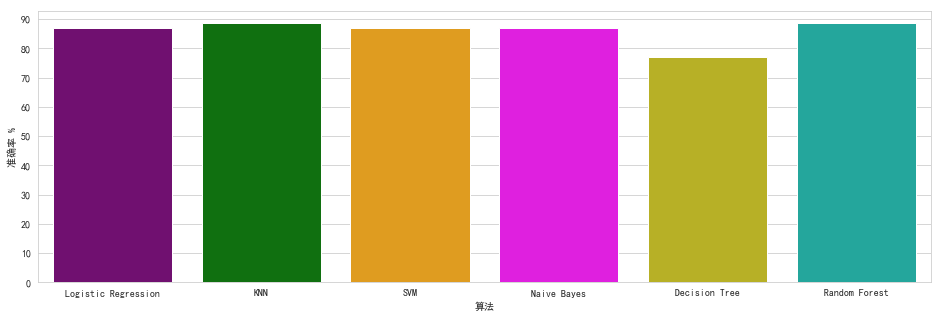

In [42]:
#六种模型的比较
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.ylabel("准确率 %")
plt.xlabel("算法")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()
##KNN和随机森林预测准确率最高,都为88.52%


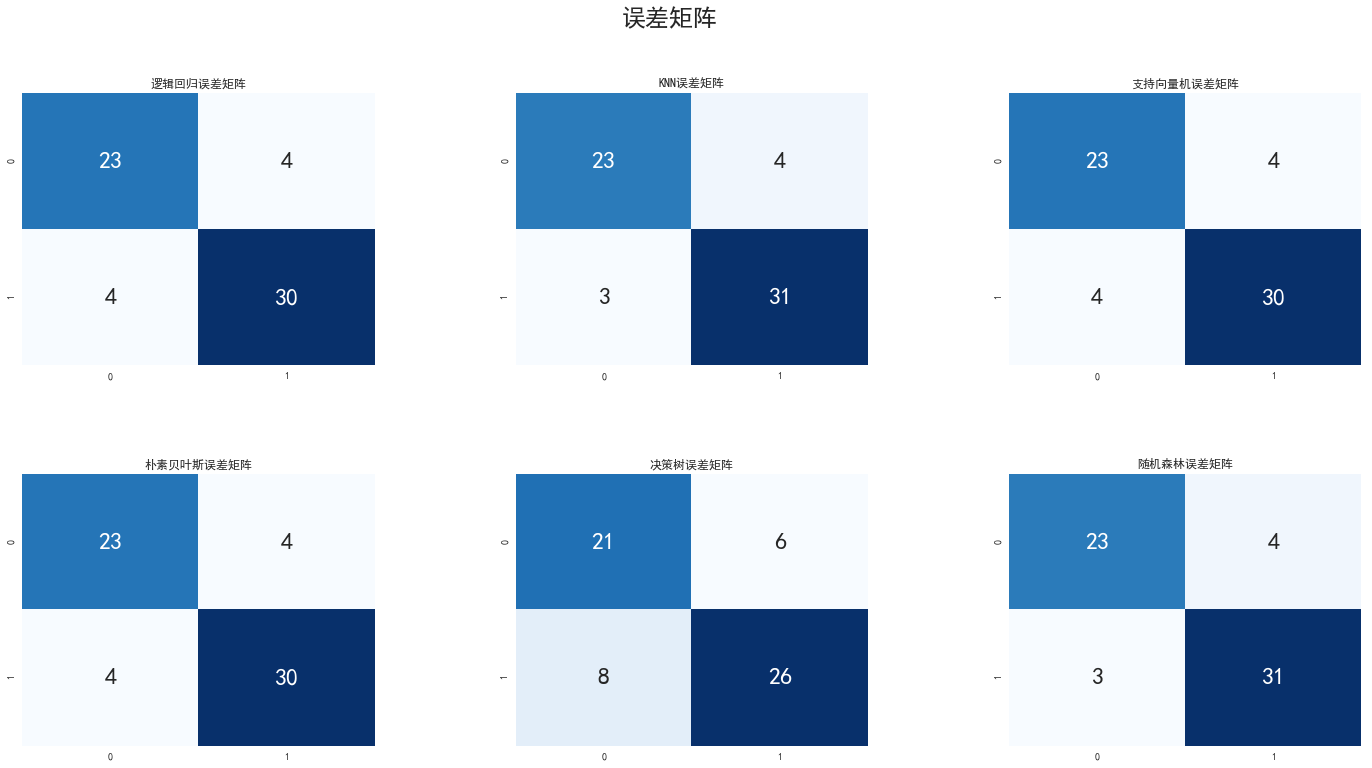

In [44]:
#查看各个算法的误差矩阵/混淆矩阵
# https://blog.csdn.net/m0_38061927/article/details/77198990
# 预测值
y_head_lr = lr.predict(x_test)
knn3 = KNeighborsClassifier(3)
knn3.fit(x_train, y_train)
y_head_knn = knn3.predict(x_test)
y_head_svm = svm.predict(x_test)
y_head_nb = nb.predict(x_test)
y_head_dtc = dtc.predict(x_test)
y_head_rf = rf.predict(x_test)


cm_lr = confusion_matrix(y_test,y_head_lr)
cm_knn = confusion_matrix(y_test,y_head_knn)
cm_svm = confusion_matrix(y_test,y_head_svm)
cm_nb = confusion_matrix(y_test,y_head_nb)
cm_dtc = confusion_matrix(y_test,y_head_dtc)
cm_rf = confusion_matrix(y_test,y_head_rf)

plt.figure(figsize=(24,12))

plt.suptitle("误差矩阵",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("逻辑回归误差矩阵")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("KNN误差矩阵")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("支持向量机误差矩阵")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("朴素贝叶斯误差矩阵")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("决策树误差矩阵")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("随机森林误差矩阵")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

